In [1]:
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss

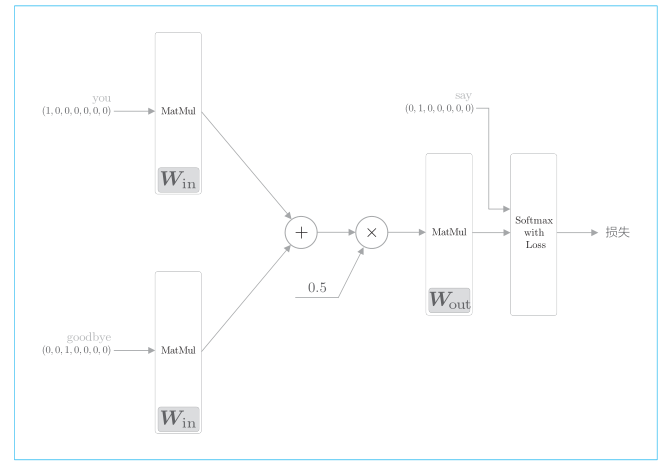

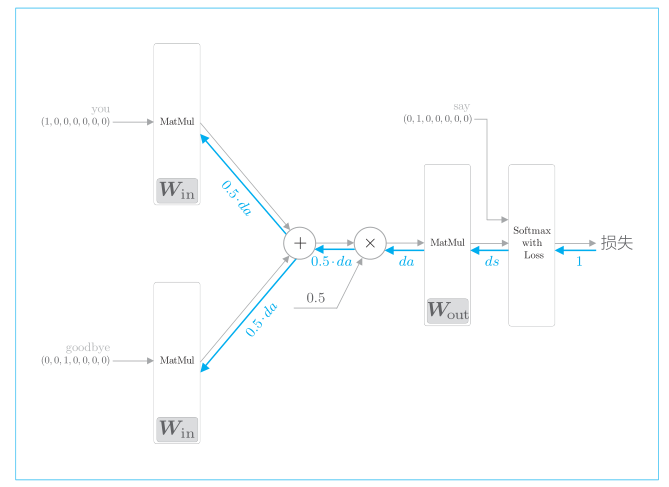

In [2]:
class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size
        
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.rand(H, V).astype('f')
        
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()
        
        # 将所有的权重和梯度整理到列表中
        layers = [
            self.in_layer0,
            self.in_layer1,
            self.out_layer
        ]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads
        
        # 将单词的分布式表示设置为成员变量
        self.word_vecs = W_in
        
    def forward(self,  contexts, target):
        """
        假定contexts是三维数组，第0维的元素个数是mini-batch的数量，第1维的元素个数是上下文的窗口大小，第2维是表示one-hot向量。
        """
        h0 = self.in_layer0(contexts[:, 0])
        h1 = self.in_layer1(contexts[:, 1])
        h = (h0+h1) * 0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss
    
    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None